In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.animation as animation
import nbimporter
import Commons as commons

%matplotlib notebook

'''******************************
*   Variable Initializations    *
******************************'''

NX = 15                                                        # X dimension
NY = 10                                                        # Y dimension
omega = 1                                                    # The relaxation time 1/T
epsilon = 0.01                                                 # Random change value
w_i = [4/9, 1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36]        # Weights
c_ij = np.array([[0,0],                                        # Velocity vector for different positions
                 [1,0],
                 [0,1],
                 [-1,0],
                 [0,-1],
                 [1,1],
                 [-1,1],
                 [-1,-1],
                 [1,-1]])
nu = 1/3 * (1/omega - 1/2)                                      # Kinetic viscousity

In [ ]:
'''******************************
#   Shear Wave Decay - density  *
******************************'''
%matplotlib tk

# Initialisations
rho_ij = np.ones([NY, NX])
u_ijk = np.zeros([2, NY, NX])
showAnimation = True                         # Set this to True for animation

# Set the density
for j in np.arange(NX):
    rho_ij[:,j] = 1. + epsilon * np.sin(2. * np.pi * j / NX)

# Initialize probability distribution
f_ijk = commons.calc_feq(w_i, c_ij, rho_ij, u_ijk, NY, NX)

# Initialize values to plot the animated line plot
fig, ax = plt.subplots()
ax.set(xlabel='X-direction', ylabel='density (rho)', title='Shear Wave Decay (Density)')

if showAnimation:
    def init():
        # Set properties of the graph
        animate(0)

    def animate(i):
        global f_ijk, rho_ij, u_ijk
        # Streaming
        f_ijk = commons.streaming(f_ijk, c_ij)
        # Calculating the new probability distribution
        f_ijk, rho_ij, u_ijk = commons.collision(f_ijk, c_ij, w_i, omega)
        # plot only every second iteration for better performance
        if (i % 2 == 0):
            line = ax.plot(np.arange(rho_ij.shape[1]), rho_ij[1, :])
            # # Code to save png files (for ffmpeg to create a gif later)
            # plt.savefig('swd_d{}.png'.format(count))
            # count = count + 1
        else: 
            line = ax.plot()
        return line

    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=20)
else:
    for i in np.arange(1001):
        # Streaming
        f_ijk = commons.streaming(f_ijk, c_ij)
        # Collision
        f_ijk, rho_ij, u_ijk = commons.collision(f_ijk, c_ij, w_i, omega)

        # Plot and save the graph as a gif
        if i % 1000 == 0:
            if i != 0:
                line = plt.plot(np.arange(rho_ij.shape[1]), rho_ij[1, :], label="Step {}".format(i),color="red")
            else:
                line = plt.plot(np.arange(rho_ij.shape[1]), rho_ij[1, :], label="Step {}".format(i))
            plt.legend(loc='upper right')
        elif i % 10 == 0:
            line = plt.plot(np.arange(rho_ij.shape[1]), rho_ij[1, :])

    plt.show()


In [ ]:
'''******************************
#  Shear Wave Decay - velocity  *
******************************'''

# Initialisations
rho_ij = np.ones([NY, NX])
u_ijk = np.zeros([2, NY, NX])
showAnimation = True                         # Set this to True for animation

# Set the velocity
for i in np.arange(NX):
    u_ijk[0,:,i] = epsilon * np.sin(2. * np.pi * i / NX)

# Initialize probability distribution
f_ijk = commons.calc_feq(w_i, c_ij, rho_ij, u_ijk, NY, NX)

# Initialize values to plot the animated line plot
fig, ax = plt.subplots()
ax.set(xlabel='X-direction', ylabel='velocity (ux)', title='Shear Wave Decay (Velocity)')

if showAnimation:
    def init():
        animate(0)

    def animate(i):
        global f_ijk, rho_ij, u_ijk, count
        # Streaming
        f_ijk = commons.streaming(f_ijk, c_ij)
        # Calculating the new probability distribution
        f_ijk, rho_ij, u_ijk = commons.collision(f_ijk, c_ij, w_i, omega)
        # Plot the graph
        if (i % 2 == 0):
            line = ax.plot(np.arange(u_ijk.shape[2]), u_ijk[0,1,:])
            # # Code to save png files (for ffmpeg to create a gif later)
            # plt.savefig('swd_d{}.png'.format(count))
            # count = count + 1
        else: 
            line = ax.plot()
        return line

    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=800, interval=20)
else:
    for i in np.arange(1001):
        # Streaming
        f_ijk = commons.streaming(f_ijk, c_ij)
        # Collision
        f_ijk, rho_ij, u_ijk = commons.collision(f_ijk, c_ij, w_i, omega)
        # Plot and save the graph as a gif
        if i % 1000 == 0:
            if i != 0:
                line = plt.plot(np.arange(u_ijk.shape[2]), u_ijk[0,1,:], label="Step {}".format(i),color="red")
            else:
                line = plt.plot(np.arange(u_ijk.shape[2]), u_ijk[0,1,:], label="Step {}".format(i))
            plt.legend(loc='upper right')
        elif i % 10 == 0:
            line = plt.plot(np.arange(u_ijk.shape[2]), u_ijk[0,1,:])

    plt.show()

<IPython.core.display.Javascript object>


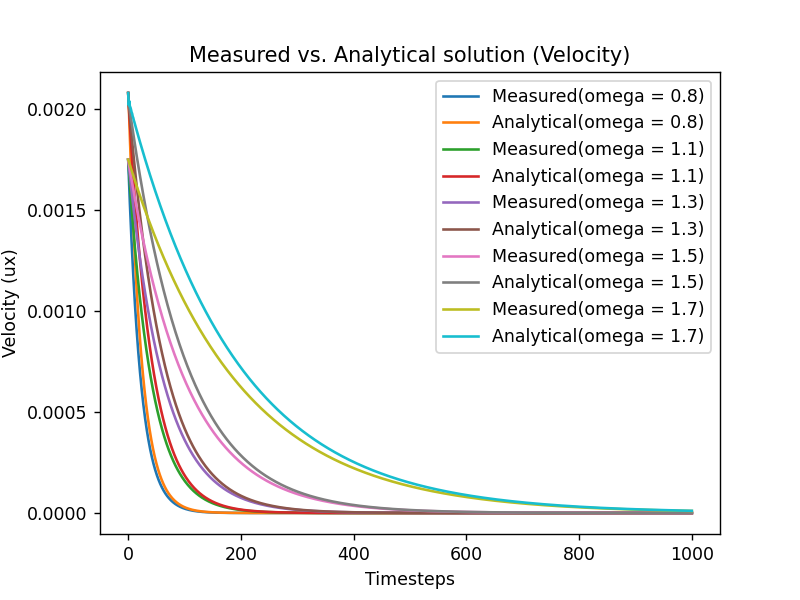

<IPython.core.display.Javascript object>


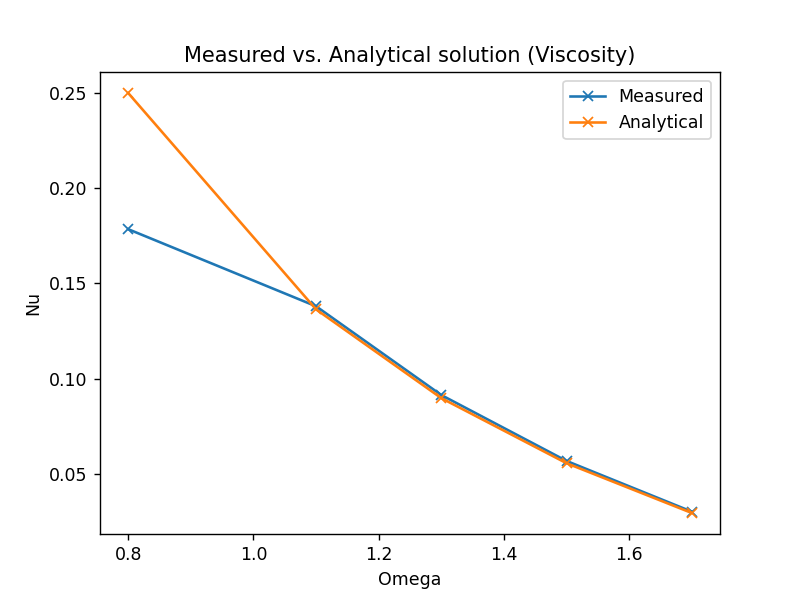

In [187]:
'''******************************
#      Analytical solution      *
******************************'''

# Initialisations
rho_ij = np.ones([NY, NX])
u_ijk = np.zeros([2, NY, NX])

# Initialize values to plot the animated line plot
fig, ax = plt.subplots()
timesteps = np.arange(1001)                                     # No. of timesteps
omegas = [0.8, 1.1, 1.3, 1.5, 1.7]                              # Relaxation approximation
nus = [(1/3 * (1/i - 1/2)) for i in omegas]                     # Kinetic viscousity
k = 2. * np.pi / NX
count = 0
u_measured = np.zeros([len(omegas),len(timesteps)])             # Measured velocity
u_analytical = np.zeros_like(u_measured)                        # Velocity Calculated
nu_measured = np.zeros_like(nus)                                # Measured Kinetic viscousity



for j in omegas:
    # Reset the velocity
    for i in np.arange(NX):
        u_ijk[0,:,i] = epsilon * np.sin(2. * np.pi * i / NX)
    u0 = u_ijk[0,NY//4,NX//2].copy()
    # Initialize probability distribution
    f_ijk = commons.calc_feq(w_i, c_ij, rho_ij, u_ijk, NY, NX)
    
    for i in timesteps:
        u_measured[count,i] = u0 * np.exp(-nus[count] * k**2 * (i)) * np.sin(k * NY//4)
        u_analytical[count,i] = u_ijk[0,NY//4,NX//2]

        # Streaming
        f_ijk = commons.streaming(f_ijk, c_ij)
        # Collision
        f_ijk, rho_ij, u_ijk = commons.collision(f_ijk, c_ij, w_i, omegas[count])
    
    # Velocity vs. Time plots
    ax.set(xlabel='Timesteps', ylabel='Velocity (ux)', title='Measured vs. Analytical solution (Velocity)')
    plt.plot(u_measured[count],label="Measured(omega = {})".format(j))
    plt.plot(u_analytical[count],label="Analytical(omega = {})".format(j))
    plt.legend()
    
    # Find the Viscosity
    nu_measured[count] = -np.log(u_ijk[0,NY//4,NX//2]/u0)/(k**2 * i-1)
    # Increment count to check for the next value of omega
    count += 1

# Omega vs. Nu plots
fig1, ax1 = plt.subplots()
ax1.set(xlabel='Omega', ylabel='Nu', title='Measured vs. Analytical solution (Viscosity)')
plt.plot(omegas, nu_measured, label="Measured",marker="x")
plt.plot(omegas, nus, label="Analytical",marker="x")
plt.legend()